# Visualizing BO results

In [6]:
import numpy as np 


# read the npy data from results
rdkit_gprq = np.load('./results/lipo_rdkit_ratio0.05_iter3_trial3GPRQ.npy', allow_pickle=True).item()
rdkit_gptani = np.load('./results/lipo_rdkit_ratio0.05_iter3_trial3GPTanimoto.npy', allow_pickle=True).item()


mol2vec_RF = np.load('./results/lipo_mol2vec_ratio0.05_iter3_trial2RandomForest.npy', allow_pickle=True).item()
mol2vec_gptani = np.load('./results/lipo_mol2vec_ratio0.05_iter3_trial2GPTanimoto.npy', allow_pickle=True).item()


In [7]:
num_trial = len(rdkit_gprq['bests_over_trials'])
num_iter = len(rdkit_gprq['bests_over_trials'][0])

rdkit_gprq_best_observed = np.array(rdkit_gprq['bests_over_trials'])
rdkit_gptani_best_observed = np.array(rdkit_gptani['bests_over_trials'])
mol2vec_RF_best_observed = np.array(mol2vec_RF['bests_over_trials'])
mol2vec_gptani_best_observed = np.array(mol2vec_gptani['bests_over_trials'])

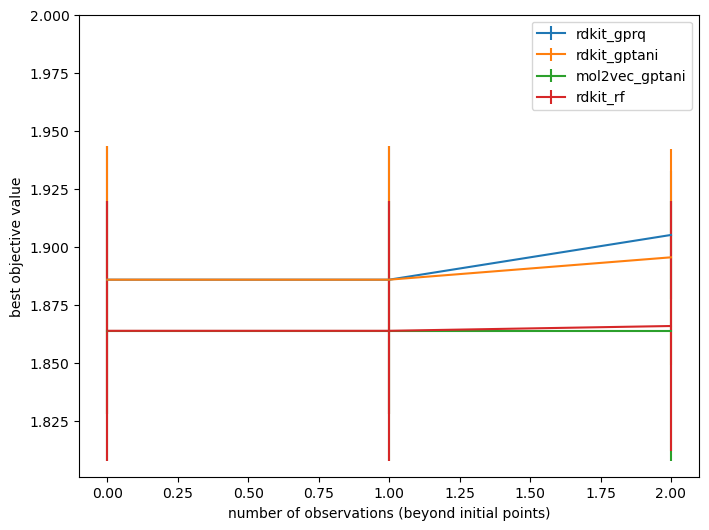

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
def ci(y):
    return 1.96 * y.std(axis=0) / np.sqrt(num_trial)

#plot the df data and add 
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#plot errorbar from the mean and std of the best observed value
ax.errorbar(x=np.arange(num_iter), y=rdkit_gprq_best_observed.mean(axis=0), yerr=ci(rdkit_gprq_best_observed), label="rdkit_gprq", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=rdkit_gptani_best_observed.mean(axis=0), yerr=ci(rdkit_gptani_best_observed), label="rdkit_gptani", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=mol2vec_gptani_best_observed.mean(axis=0), yerr=ci(mol2vec_gptani_best_observed), label="mol2vec_gptani", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=mol2vec_RF_best_observed.mean(axis=0), yerr=ci(mol2vec_RF_best_observed), label="rdkit_rf", linewidth=1.5)


#set labels
ax.set(
    xlabel="number of observations (beyond initial points)",
    ylabel="best objective value",
)
ax.set_ylim(top=2.0)
ax.legend(loc="upper right")